In [2]:
# 필요한 패키지 참조

from pandas import read_excel, DataFrame, pivot_table, to_datetime, concat
import numpy as np
import sys
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime,timedelta 
import pandas as pd

In [3]:
origin = read_excel('C:/Users/bthy2/OneDrive/바탕 화면/GitHub에 올릴자료/최종정리/프로젝트/1.탐색적데이터분석프로젝트/미세먼지data/필수데이터_전처리코드/외부미세먼지최종_(2208~2308).xlsx')


In [3]:
plt.rcParams['font.family']='AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size']=12
plt.rcParams['figure.figsize']=(12,6)
plt.rcParams['axes.unicode_minus']=False

In [4]:
df = origin[['년월일','지역','일별평균']]
pd.options.display.max_rows=100
# 일별평균 순으로 정렬
df2 = df.sort_values('일별평균')
df2['일별평균']=df2['일별평균'].astype('int')
tdf = df2
tdf.describe()
# 1년 전체 평균 18

,일별평균
count,10149.000000
mean,18.869839
std,12.815298
min,1.000000
25%,10.000000
50%,16.000000
75%,24.000000
max,102.000000


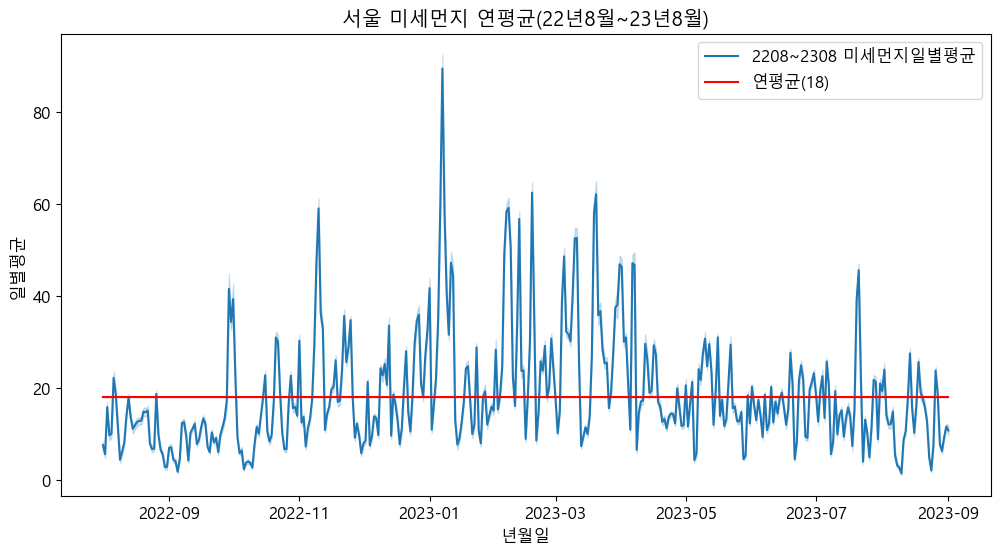

In [5]:
# 1년 lineplot

# lineplot

sns.lineplot(x=tdf['년월일'],y=tdf['일별평균'],label='2208~2308 미세먼지일별평균')
sns.lineplot(x=tdf['년월일'],y=18,label='연평균(18)', color='#ff0000')

plt.title("서울 미세먼지 연평균(22년8월~23년8월)")
plt.show()
plt.close()


In [6]:
# 도수분포표 그리기

hist, bins = np.histogram(df2['일별평균'],15)
# print(hist)
# print(bins)

s = len(hist)
for i in range(0,s):
    if i+1 <s:
        tpl = '%d이상 %d미만: %d개'
    else:
        tpl = '%d이상 %d미만: %d개'

    print(tpl % (bins[i],bins[i+1],hist[i]))

1이상 7미만: 1397개
7이상 14미만: 3176개
14이상 21미만: 2469개
21이상 27미만: 1199개
27이상 34미만: 870개
34이상 41미만: 374개
41이상 48미만: 236개
48이상 54미만: 180개
54이상 61미만: 137개
61이상 68미만: 65개
68이상 75미만: 20개
75이상 81미만: 6개
81이상 88미만: 5개
88이상 95미만: 9개
95이상 102미만: 6개


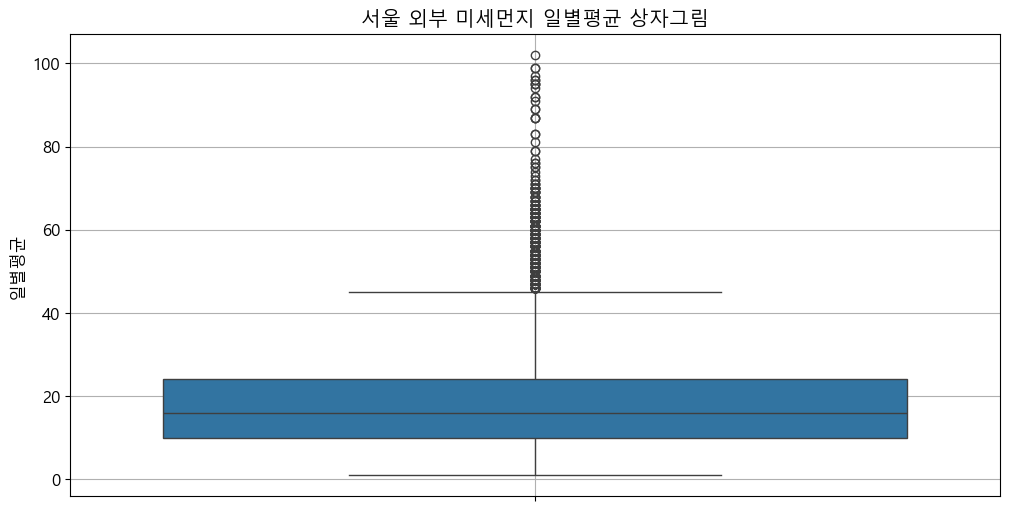

In [7]:
# 상자그림
plt.figure()
sns.boxplot(data=df2['일별평균'])
plt.grid()
plt.title("서울 외부 미세먼지 일별평균 상자그림")
plt.show()
plt.close()

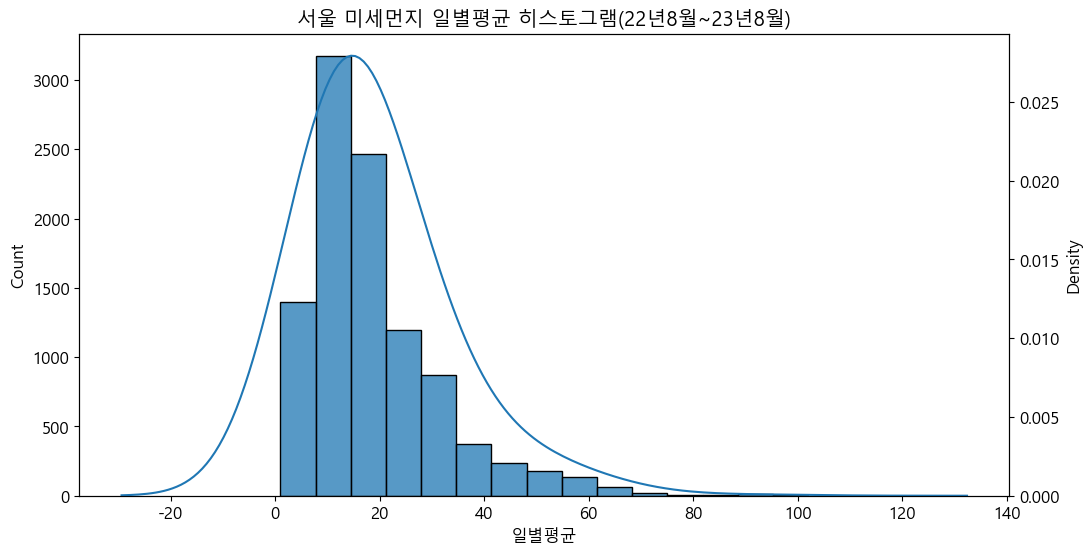

In [8]:
fig, ax1 = plt.subplots(1,1)
ax2 = ax1.twinx()


sns.histplot(data=df2, x='일별평균', bins=15, ax= ax1)
sns.kdeplot(data=df2, x='일별평균',bw_adjust=5, ax=ax2)

plt.title("서울 미세먼지 일별평균 히스토그램(22년8월~23년8월)")
plt.show()
plt.close()

In [9]:
# 기술통계량 확인
df2.describe()

,년월일,일별평균
count,10149,10149.000000
mean,2023-02-15 10:54:48.205734656,18.869839
min,2022-08-01 00:00:00,1.000000
25%,2022-11-08 00:00:00,10.000000
50%,2023-02-16 00:00:00,16.000000
75%,2023-05-26 00:00:00,24.000000
max,2023-09-01 00:00:00,102.000000
std,NaN,12.815298


In [10]:
# 12~3월 월별 평균 구하기

df3 = df2[(df2['년월일'] >= '2022-12-01') & (df2['년월일'] <= '2023-03-31')]
df4 = df3.sort_values('지역',ascending=False)
df4['월']=df4['년월일'].dt.month
df4['일별평균']=df4['일별평균'].astype('int')
df5 = df4[['일별평균','월']]
df6 = df5.groupby('월').mean()
df7 = df6.rename(columns={'일별평균':'월별평균'})
df7['월별평균']=df7['월별평균'].astype('int')
df4.sort_values('년월일')
df4
# 12~3월 평균은 25.8  -> 25 대비 100% 이상인 50 이상인 날짜 추출

,년월일,지역,일별평균,월
3910,2022-12-19,서울 중랑구,13,12
3911,2022-12-20,서울 중랑구,22,12
4694,2023-01-27,서울 중랑구,21,1
3899,2022-12-08,서울 중랑구,11,12
4676,2023-01-09,서울 중랑구,41,1
...,...,...,...,...
3148,2022-12-25,서울 강남구,25,12
3138,2022-12-15,서울 강남구,17,12
3943,2023-01-20,서울 강남구,16,1
4708,2023-02-09,서울 강남구,22,2


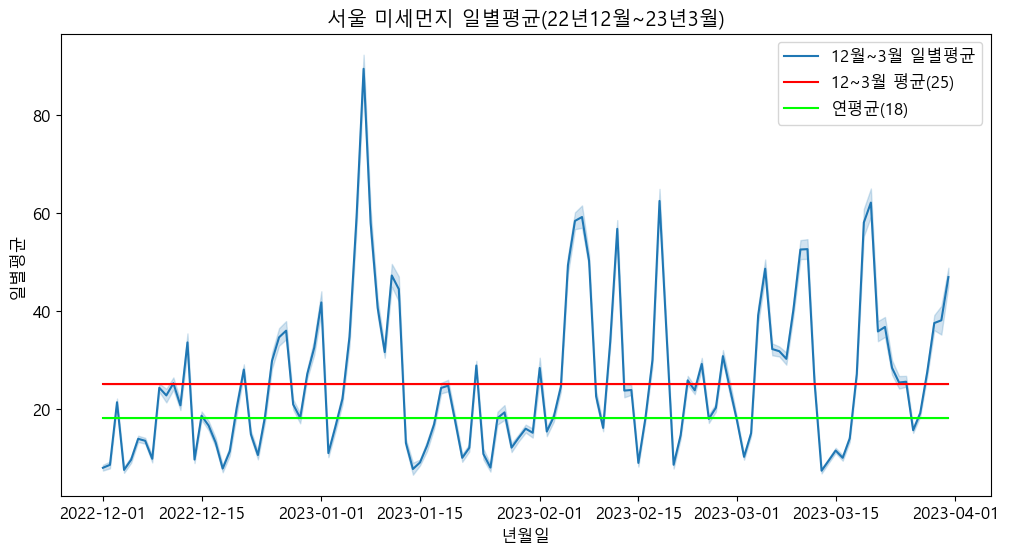

In [11]:
# lineplot

sns.lineplot(x=df4['년월일'],y=df4['일별평균'],label='12월~3월 일별평균')
sns.lineplot(x=df4['년월일'],y=25,label='12~3월 평균(25)', color='#ff0000')
sns.lineplot(x=df4['년월일'],y=18,label='연평균(18)', color='#00ff00')

plt.title("서울 미세먼지 일별평균(22년12월~23년3월)")
plt.show()
plt.close()

In [12]:
# # 12~3월 평균 25보다 높은 수치인 날짜,구 추출
df_high_mean = df4[df4['일별평균']>25]
df_high_mean_0107 = df_high_mean.query('년월일=="20230107"')
df_high_mean_0107.reset_index(drop=True)
df_high_mean_0107.sort_values('일별평균',ascending=False)


# # 가장 빈도수 높은 날짜 추출
# df_high_meancount = df_high_mean[['년월일','일별평균']]
# df_high_meancount1 = df_high_meancount.groupby('년월일').count()
# df_high_meancount1.sort_values('일별평균',ascending=False)

,년월일,지역,일별평균,월
4633,2023-01-07,서울 종로구,102,1
4665,2023-01-07,서울 중구,99,1
4505,2023-01-07,서울 양천구,99,1
3962,2023-01-07,서울 강동구,97,1
4314,2023-01-07,서울 마포구,96,1
4154,2023-01-07,서울 금천구,96,1
4537,2023-01-07,서울 영등포구,95,1
4282,2023-01-07,서울 동작구,95,1
4378,2023-01-07,서울 서초구,95,1
4122,2023-01-07,서울 구로구,94,1


In [13]:
# 12~3월 평균 대비 100% 높은 수치인 50 초과인 날짜 추출
df_high = df4[df4['일별평균']>50]
df_high_0107 = df_high.query('년월일=="20230107"')
df_high

df_high_count = df_high[['년월일','일별평균']]
df_high_count1 = df_high_count.groupby('년월일').count()
df_high_count2 = df_high_count1.reset_index()
df_high_count2['월일']=df_high_count2['년월일'].dt.strftime('%m.%d')
df_high_count3=df_high_count2.rename(columns={'일별평균':'빈도수'})
df_high_count4 = df_high_count3[['월일','빈도수']]
df_high_count4.dtypes
#df_high_count1.sort_values('일별평균',ascending=False).reset_index()
# 총 20일 중 상위 11개 1/6,1/7,1/8,  2/6,2/7, 2/12, 2/18, 3/10,3/11, 3/19,3/20
#df_high.sort_values('일별평균',ascending=False)

월일     object
빈도수     int64
dtype: object

In [14]:
df_high_count['월일']=df_high_count['년월일'].dt.strftime('%m.%d')
df_high_ct = df_high_count[['월일','일별평균']].rename(columns={'일별평균':'빈도수'})
df_high_ct


C:\Users\J\AppData\Local\Temp\ipykernel_13856\2220144588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_count['월일']=df_high_count['년월일'].dt.strftime('%m.%d')


,월일,빈도수
5378,02.05,51
3923,01.01,54
5385,02.12,54
6175,03.05,55
6189,03.19,56
...,...,...
3930,01.07,87
3931,01.08,64
4717,02.18,51
4706,02.07,57


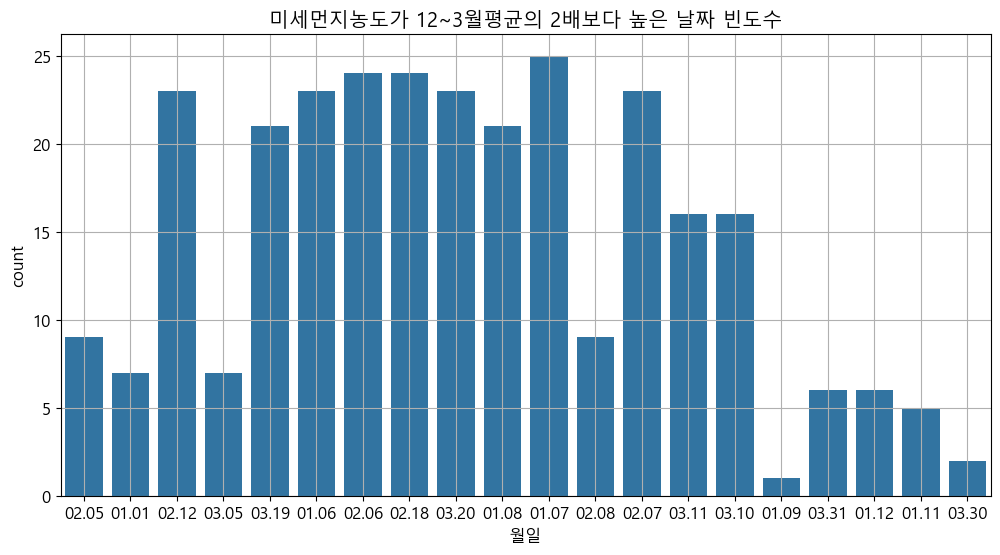

In [15]:
#countplot 위에서 날짜 빈도수 구하는거

plt.figure()
sns.countplot(data=df_high_ct, x=df_high_ct['월일'],)
plt.title("미세먼지농도가 12~3월평균의 2배보다 높은 날짜 빈도수")
plt.grid()
plt.show()
plt.close()

In [18]:
df_high
# df_high_1=df_high.query('지역=="서울 중구" or 지역=="서울 성동구" or 지역=="서울 은평구" or 지역=="서울 강남구" or 지역=="서울 성북구" or 지역=="서울 종로구" or 지역=="서울 강동구" or 지역=="서울 강서구"')
# df_high_2 = df_high_1.query('년월일=="20230107"')
# df_high_2['일별평균'] = df_high_2['일별평균'].astype('int')
# df_high_2

,년월일,지역,일별평균,월
5378,2023-02-05,서울 중랑구,51,2
3923,2023-01-01,서울 중랑구,54,1
5385,2023-02-12,서울 중랑구,54,2
6175,2023-03-05,서울 중랑구,55,3
6189,2023-03-19,서울 중랑구,56,3
...,...,...,...,...
3930,2023-01-07,서울 강남구,87,1
3931,2023-01-08,서울 강남구,64,1
4717,2023-02-18,서울 강남구,51,2
4706,2023-02-07,서울 강남구,57,2


In [33]:
pd.options.display.max_rows=60
df4 = df3.sort_values('년월일')
#df3['일별평균'] = df3['일별평균'].astype('int')
df4['12~3월평균']=25
df4['12~3월평균대비%']=(df4['일별평균']-df4['12~3월평균'])/df4['12~3월평균']*100
df5 = df4[df4['년월일']=='20230107']
df6= df5.query('지역=="서울 강남구" or 지역=="서울 광진구" or 지역=="서울 구로구" or 지역=="서울 노원구" or 지역=="서울 동작구" or 지역=="서울 마포구" or 지역=="서울 영등포구" or 지역=="서울 은평구" or 지역=="서울 중구"')
gu = ['영등포구','은평구','마포구','중구','동작구','구로구','광진구','노원구','강남구']
df6['자치구']=['영등포구','은평구','마포구','중구','동작구','구로구','광진구','노원구','강남구']
df_gu_final=df6[['자치구','일별평균']]
df_gu_final
# df5 = df4[df4['12~3월평균대비%'] >= 0 ]
# df5.to_excel('산점도데이터_외부.xlsx')

C:\Users\J\AppData\Local\Temp\ipykernel_13856\3219695565.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['자치구']=['영등포구','은평구','마포구','중구','동작구','구로구','광진구','노원구','강남구']


,자치구,일별평균
4537,영등포구,95
4601,은평구,89
4314,마포구,96
4665,중구,99
4282,동작구,95
4122,구로구,94
4090,광진구,81
4186,노원구,92
3930,강남구,87


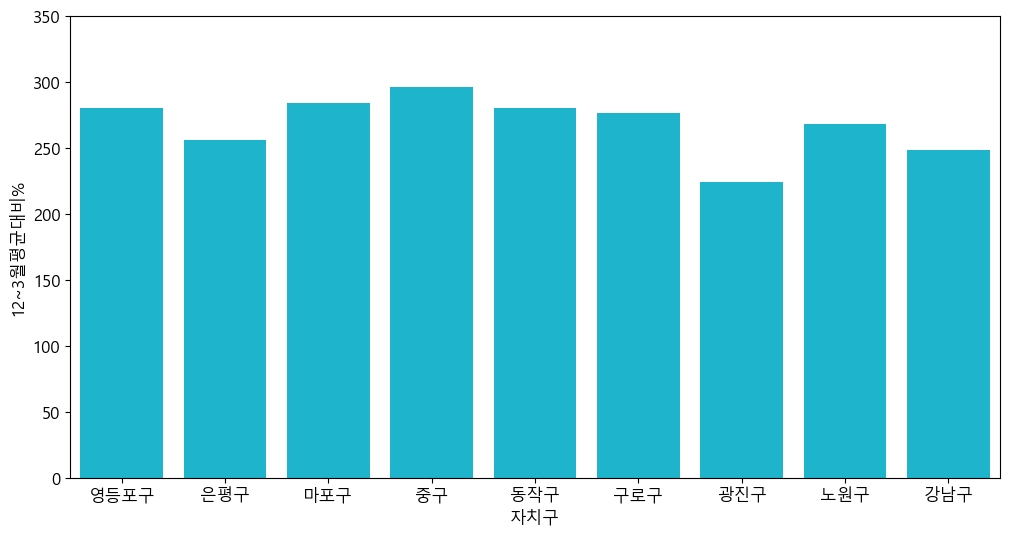

In [29]:
# 1/7 유동인구 고려한 선별역의 자치구의 12~3월 평균 대비 오른 % 시각화

plt.figure()
sns.barplot(data=df6, x=df6['자치구'], y=df6['12~3월평균대비%'],color='#00c9e9')
plt.ylim(0,350)
plt.show()
plt.close()

In [ ]:
# 도수분포표 그리기

hist, bins = np.histogram(df5['12~3월평균대비%'],12)
# print(hist)
# print(bins)

s = len(hist)
for i in range(0,s):
    if i+1 <s:
        tpl = '%d이상 %d미만: %d개'
    else:
        tpl = '%d이상 %d미만: %d개'

    print(tpl % (bins[i],bins[i+1],hist[i]))

0이상 25미만: 476개
25이상 51미만: 292개
51이상 77미만: 182개
77이상 102미만: 116개
102이상 128미만: 139개
128이상 154미만: 76개
154이상 179미만: 37개
179이상 205미만: 15개
205이상 231미만: 4개
231이상 256미만: 7개
256이상 282미만: 7개
282이상 308미만: 6개


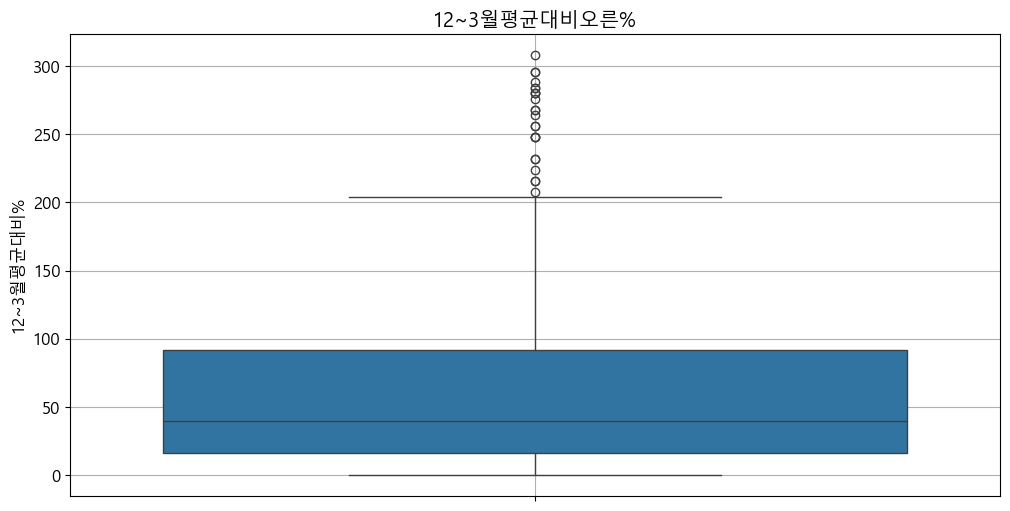

In [ ]:
# 상자그림
plt.figure()
sns.boxplot(data=df5['12~3월평균대비%'])
plt.grid()
plt.title("12~3월평균대비오른%")
plt.show()
plt.close()

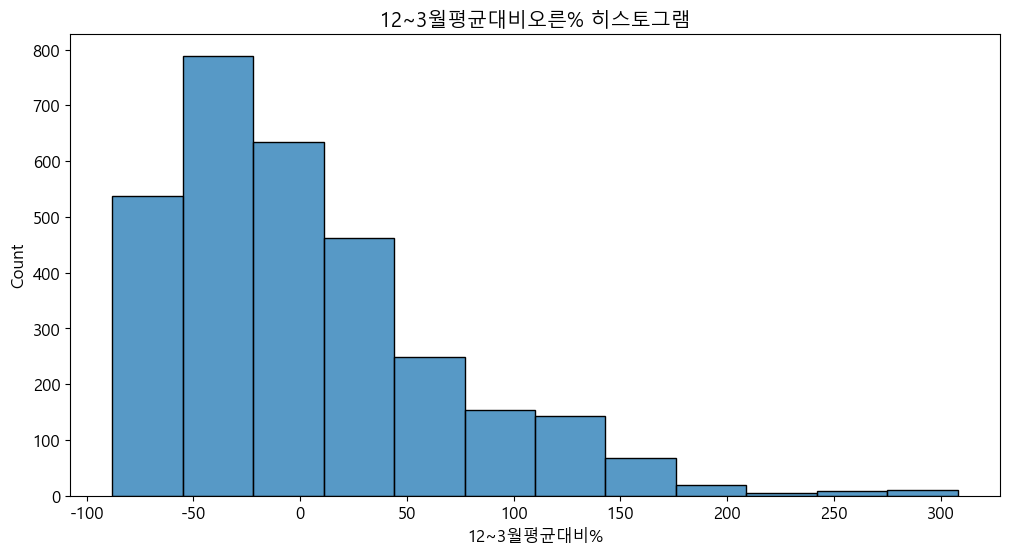

In [ ]:
#히스토그램
sns.histplot(data=df4, x='12~3월평균대비%', bins=12)
plt.title("12~3월평균대비오른% 히스토그램")
plt.show()
plt.close()